Applying Machine Learning model for predicting the price of product based on discount percentage, rating and rating count available in amazon dataset.
Dataset source: Kaggle

In [84]:
import pandas as pd

# Load the provided dataset
data = pd.read_csv('/content/amazon.csv')


Preprocessing the data for making the dataset suitable for regression purpose.

In [85]:
# Clean and preprocess the data
# Convert price columns to numeric after removing currency symbol and commas
def convert_price(price_str):
    try:
        return float(price_str.replace(',', '').replace('₹', '').strip())
    except ValueError:
        return None

In [86]:
data['discounted_price'] = data['discounted_price'].apply(convert_price)
data['actual_price'] = data['actual_price'].apply(convert_price)

# Remove '%' from 'discount_percentage' and convert to float
data['discount_percentage'] = data['discount_percentage'].str.replace('%', '').astype(float)

data['rating'] = data['rating'].str.replace('|','4.0').astype('float64')

<ipython-input-86-2d5246c4675e>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['rating'] = data['rating'].str.replace('|','4.0').astype('float64')


In [87]:
# Display basic information about the dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   object 
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [88]:
print(data.head())

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   
2  Computers&Accessories|Accessories&Peripherals|...             199.0   
3  Computers&Accessories|Accessories&Peripherals|...             329.0   
4  Computers&Accessories|Accessories&Peripherals|...             154.0   

   actual_price  discount_percentage  rating rating_count  \
0        1099.0                 64.0     4.2       24,269   
1         349.0         

In [89]:
data['rating_count'] = data['rating_count'].str.replace(',','').astype('float64')
data['rating_count'].fillna(data['rating_count'].mode()[0], inplace=True)

Performing EDA for getting more idea of the dataset used.
Understanding how the factors are corellated using heatmap and sns plot

<ipython-input-90-33d0729e8f2b>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


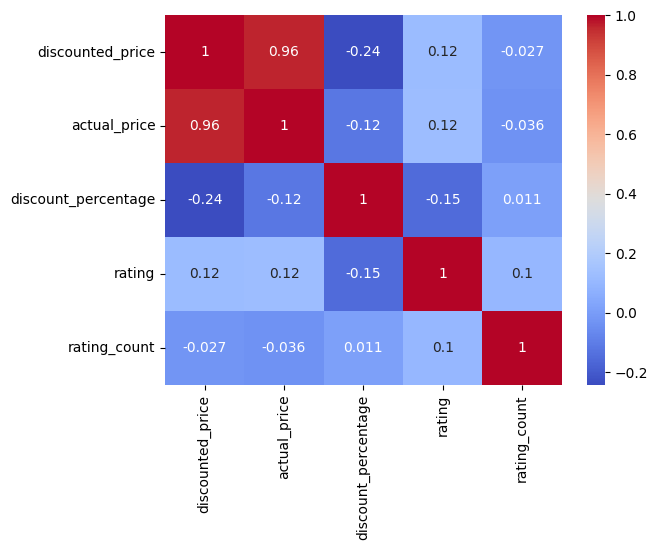

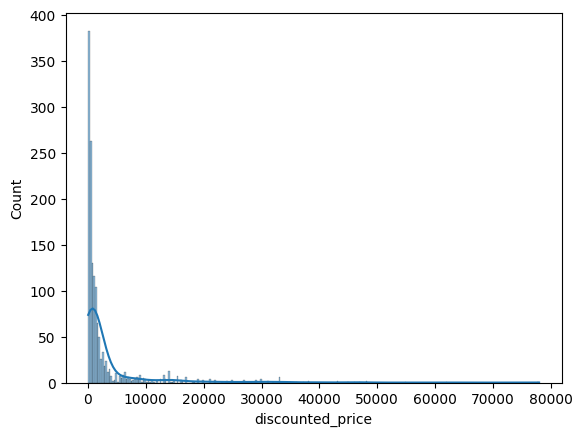

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Visualize price distribution
sns.histplot(data['discounted_price'], kde=True)
plt.show()


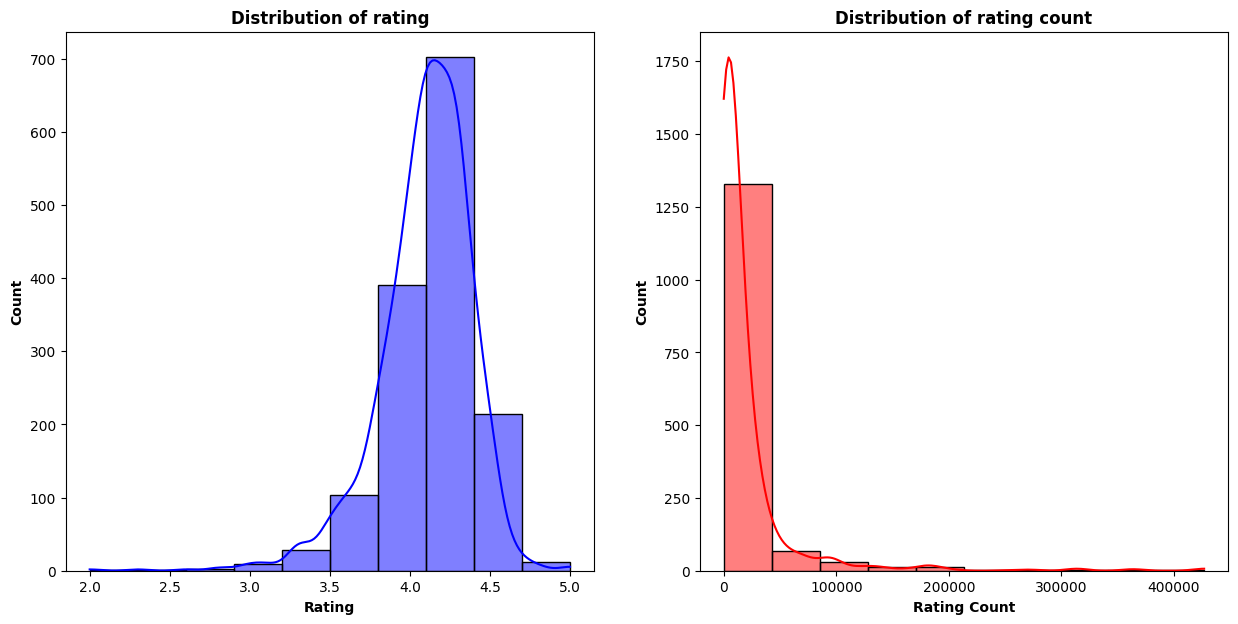

In [107]:
fig, ax = plt.subplots(1,2, figsize = (15,7))


sns.histplot(ax=ax[0],data=data, x='rating', bins=10, kde=True, color='blue')
sns.histplot(ax=ax[1],data=data, x='rating_count', bins=10, kde=True, color='red')

ax[0].set_title('Distribution of rating', fontweight='bold')
ax[1].set_title('Distribution of rating count', fontweight='bold')

ax[0].set_xlabel('Rating', fontweight='bold')
ax[1].set_xlabel('Rating Count', fontweight='bold')

ax[0].set_ylabel('Count', fontweight='bold')
ax[1].set_ylabel('Count', fontweight='bold')


plt.show()

In [109]:
rating_score = []
for i in data['rating']:
    if i < 2.0: rating_score.append('Very unsatified')
    elif i < 3.0: rating_score.append('Unsatified')
    elif i < 4.0: rating_score.append('Neutral')
    elif i < 5.0: rating_score.append('Satified')
    elif i == 5.0: rating_score.append('Very satified')

In [111]:
data['rating_score'] = rating_score
data['rating_score'] = data['rating_score'].astype('category')
# Reorder cateories
data['rating_score'] = data['rating_score'].cat.reorder_categories(['Unsatified', 'Neutral', 'Satified','Very satified'], ordered=True)
data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,rating_score
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Satified
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Satified
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Neutral
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Satified
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Satified


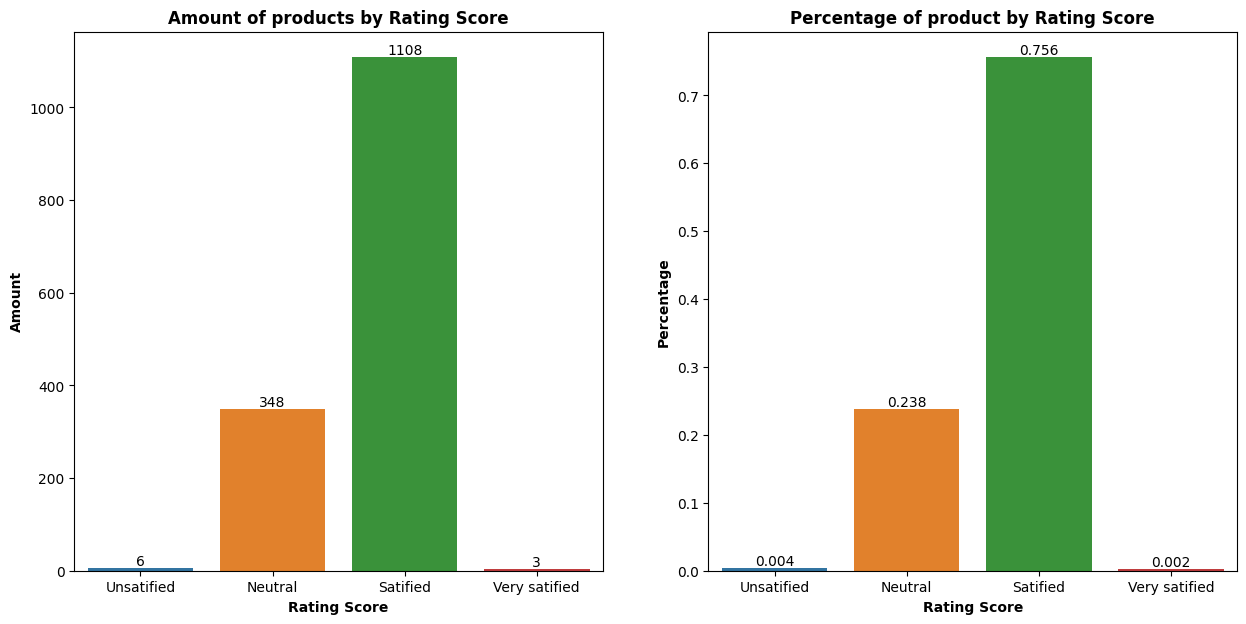

In [114]:
rating_score_pct = data['rating_score'].value_counts(normalize=True).rename_axis('score').reset_index(name='score_pct')
rating_score_pct['score_pct'] = rating_score_pct['score_pct'].round(3)
fig, ax = plt.subplots(1,2, figsize = (15,7))
sns.countplot(ax=ax[0], data=data, x='rating_score')
sns.barplot(ax=ax[1],data = rating_score_pct, x='score', y='score_pct')

ax[0].set_title('Amount of products by Rating Score', fontweight = 'bold')
ax[1].set_title('Percentage of product by Rating Score', fontweight = 'bold')

ax[0].set_xlabel('Rating Score', fontweight = 'bold')
ax[1].set_xlabel('Rating Score', fontweight = 'bold')

ax[0].set_ylabel('Amount', fontweight = 'bold')
ax[1].set_ylabel('Percentage', fontweight = 'bold')

ax[0].bar_label(ax[0].containers[0])
ax[1].bar_label(ax[1].containers[0])
plt.show()

Feature Selection from the dataset

In [91]:
# Select relevant features

selected_features = ['discount_percentage', 'rating','rating_count']
X = data[selected_features]
y = data['discounted_price']


In [92]:
X

,discount_percentage,rating,rating_count
0,64.0,4.2,24269.0
1,43.0,4.0,43994.0
2,90.0,3.9,7928.0
3,53.0,4.2,94363.0
4,61.0,4.2,16905.0
...,...,...,...
1460,59.0,4.0,1090.0
1461,25.0,4.1,4118.0
1462,28.0,3.6,468.0
1463,26.0,4.0,8031.0


In [93]:
y

0        399.0
1        199.0
2        199.0
3        329.0
4        154.0
         ...  
1460     379.0
1461    2280.0
1462    2219.0
1463    1399.0
1464    2863.0
Name: discounted_price, Length: 1465, dtype: float64

Creation model, training and testing on dataset

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



In [95]:
# Train a linear regression model
model = LinearRegression()
model

LinearRegression()

In [96]:
model.fit(X_train, y_train)

LinearRegression()

In [103]:
# Make price predictions on the validation set
predictions = model.predict(X_val)

# Calculating Intercept, Coefficient, R Squared Value
from sklearn.metrics import r2_score

print('Linear Regression Intercept: ',model.intercept_)
print('Linear Regression Coefficient: ',model.coef_)
#print('R2 Score: ', r2_score(y_val, y_train))
# Evaluate the model
mae = mean_absolute_error(y_val, predictions)
print("Mean Square Absolute Error:",(mae**(1/2)))

Linear Regression Intercept:  -1475.3156607868195
Linear Regression Coefficient:  [-6.73616374e+01  1.92805866e+03 -6.68076582e-03]
Mean Square Absolute Error: 59.67437511844085


Deploying the model and generating the output for input values

In [123]:
attributes = [80,4.2,50000]  #(discount percentage, rating, ratingcount)
predicted_discounted_price = model.predict([attributes])
print("Predicted Discounted Price:", predicted_discounted_price[0])

Predicted Discounted Price: 899.561418769681


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
